## Exercice : 

### Origine sociale (CSP parents) vs. Choix d’études à l’Université

Quelques questions simples pour caractériser la relation :
1. Structure des filières choisies selon la CSP (profils lignes)
2. Différences/ressemblances des structures de choix selon les CSP (distance)
3. Idem – Structure des CSP des parents selon les filières (profils colonnes)
4. Associations entre CSP et FILIERES : Qui choisit quoi ? Quoi est choisi par qui ?

In [3]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np

In [4]:
df = pd.read_table("data/afc_ex.txt", header=0, index_col=0)

In [5]:
print(df)

           Droit  Science  Medecine  IUT
CSP/Fil.                                
Exp.agri      80       99        65   58
Patron       168      137       208   63
Cadre.sup    470      400       876   79
Emp.         145      133       135   54
Ouvrier      166      193       127  129


In [13]:
X=df.values
n= np.sum(X)
print(X)
n

[[ 80  99  65  58]
 [168 137 208  63]
 [470 400 876  79]
 [145 133 135  54]
 [166 193 127 129]]


3785

In [14]:
X_ligne = np.append(X,[[np.sum(X[i])] for i in range(len(X))], axis = 1)
print(X_ligne)
X_ligne_colonne = np.append(X_ligne, [[np.sum(X_ligne[:,j]) for j in range(X_ligne.shape[1])]], axis = 0)
print(X_ligne_colonne)

[[  80   99   65   58  302]
 [ 168  137  208   63  576]
 [ 470  400  876   79 1825]
 [ 145  133  135   54  467]
 [ 166  193  127  129  615]]
[[  80   99   65   58  302]
 [ 168  137  208   63  576]
 [ 470  400  876   79 1825]
 [ 145  133  135   54  467]
 [ 166  193  127  129  615]
 [1029  962 1411  383 3785]]


In [15]:
X_fij = np.round(X_ligne_colonne/n, decimals = 3)
X_fij

array([[0.021, 0.026, 0.017, 0.015, 0.08 ],
       [0.044, 0.036, 0.055, 0.017, 0.152],
       [0.124, 0.106, 0.231, 0.021, 0.482],
       [0.038, 0.035, 0.036, 0.014, 0.123],
       [0.044, 0.051, 0.034, 0.034, 0.162],
       [0.272, 0.254, 0.373, 0.101, 1.   ]])

In [36]:
my_ca = CA(row_labels=df.index.values, col_labels=df.columns.values,n_components=2)

In [37]:
my_ca.fit(X)

CA(col_labels=array(['Droit', 'Science', 'Medecine', 'IUT'], dtype=object),
   n_components=2,
   row_labels=array(['Exp.agri', 'Patron', 'Cadre.sup', 'Emp.', 'Ouvrier'], dtype=object))

In [38]:
print(my_ca.eig_[0])


[0.08231106 0.00168257]


In [39]:
print(my_ca.eig_[1])

[97.3334662  1.9896516]


In [40]:
print(my_ca.eig_[2])

[97.3334662 99.3231178]


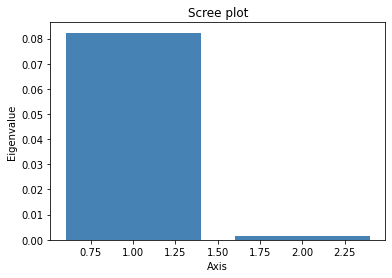

In [41]:
my_ca.plot_eigenvalues()

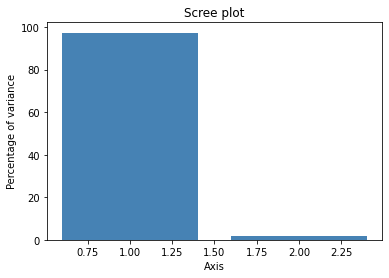

In [42]:
my_ca.plot_eigenvalues(type="percentage")

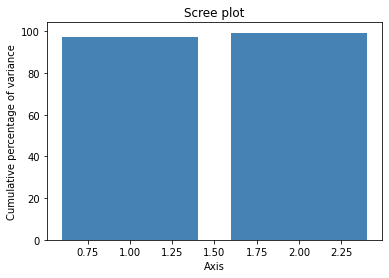

In [43]:
my_ca.plot_eigenvalues(type="cumulative")

In [44]:
df_rows = my_ca.row_topandas()
print(df_rows)

           row_coord_dim1  row_coord_dim2  row_contrib_dim1  row_contrib_dim2  \
Exp.agri         0.409300       -0.025581         16.239297          3.103142   
Patron           0.023393        0.023966          0.101170          5.194893   
Cadre.sup       -0.263181       -0.015126         40.573908          6.556144   
Emp.             0.141529        0.097860          3.002494         70.223833   
Ouvrier          0.450615       -0.039309         40.083131         14.921988   

           row_cos2_dim1  row_cos2_dim2  
Exp.agri        0.987167       0.003856  
Patron          0.155557       0.163278  
Cadre.sup       0.996089       0.003290  
Emp.            0.666802       0.318797  
Ouvrier         0.992088       0.007550  


In [45]:
print(my_ca.row_coord_)

[[ 0.40930041 -0.02558096]
 [ 0.02339255  0.02396605]
 [-0.26318069 -0.01512559]
 [ 0.14152874  0.09785957]
 [ 0.45061465 -0.0393093 ]]


In [46]:
print(my_ca.row_contrib_)

[[16.23929695  3.10314153]
 [ 0.1011704   5.19489304]
 [40.57390762  6.55614431]
 [ 3.00249367 70.22383265]
 [40.08313136 14.92198847]]


In [47]:
print(my_ca.row_cos2_)

[[0.98716711 0.00385603]
 [0.155557   0.16327796]
 [0.9960894  0.00329014]
 [0.66680164 0.31879679]
 [0.99208846 0.00754971]]


In [48]:
df_cols = my_ca.col_topandas()
print(df_cols)

          col_coord_dim1  col_coord_dim2  col_contrib_dim1  col_contrib_dim2  \
Droit           0.028124        0.060061          0.261244         58.285261   
Science         0.160310        0.003275          7.935510          0.162003   
Medecine       -0.303205       -0.029529         41.636552         19.318997   
IUT             0.638808       -0.060803         50.166694         22.233739   

          col_cos2_dim1  col_cos2_dim2  
Droit          0.168338       0.767729  
Science        0.944570       0.000394  
Medecine       0.990315       0.009393  
IUT            0.988647       0.008957  


In [49]:
print(my_ca.col_coord_)

[[ 0.02812404  0.0600608 ]
 [ 0.16031048  0.00327487]
 [-0.30320469 -0.02952897]
 [ 0.63880807 -0.06080319]]


In [50]:
print(my_ca.col_contrib_)

[[ 0.26124428 58.28526088]
 [ 7.9355098   0.16200322]
 [41.6365519  19.31899651]
 [50.16669403 22.2337394 ]]


In [51]:
print(my_ca.col_cos2_)

[[1.68337672e-01 7.67729312e-01]
 [9.44570308e-01 3.94183044e-04]
 [9.90315076e-01 9.39286421e-03]
 [9.88647476e-01 8.95680948e-03]]


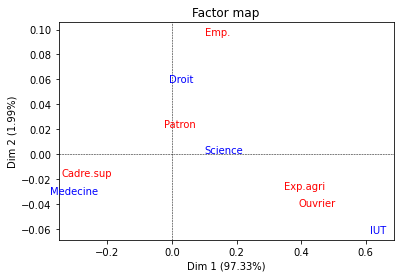

In [55]:
my_ca.mapping(num_x_axis=1, num_y_axis=2)

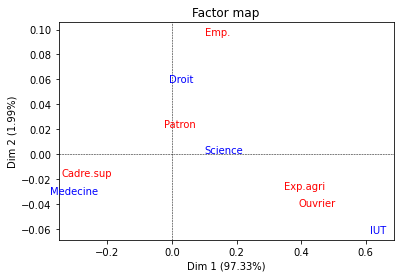

In [56]:
my_ca.mapping(num_x_axis=1, num_y_axis=2)

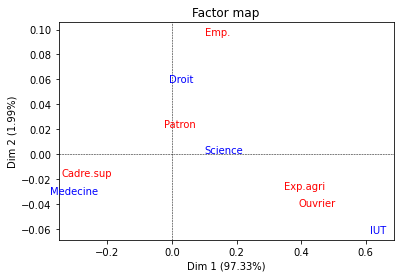

In [57]:
my_ca.mapping(num_x_axis=1, num_y_axis=2)

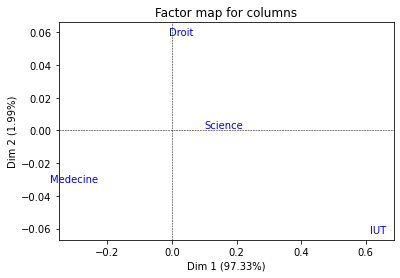

In [58]:
my_ca.mapping_col(num_x_axis=1, num_y_axis=2)

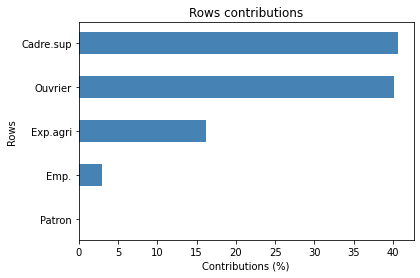

In [59]:
my_ca.plot_row_contrib(num_axis=1)

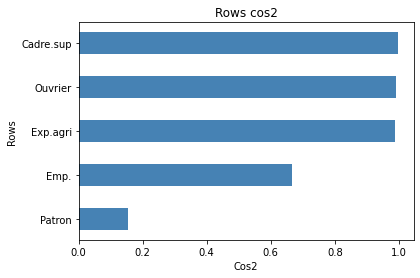

In [60]:
my_ca.plot_row_cos2(num_axis=1)

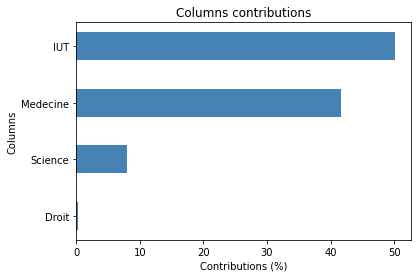

In [61]:
my_ca.plot_col_contrib(num_axis=1)

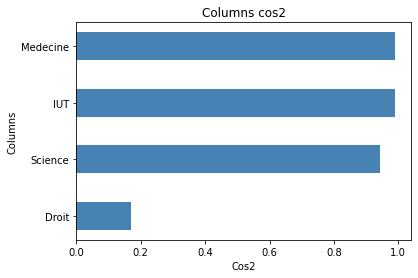

In [62]:
my_ca.plot_col_cos2(num_axis=1)